In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/spotify_dataset.csv", delimiter=',')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [26]:
#Categorical summary
categorical_summary = df.describe(include=['object','bool'])
categorical_summary

,track_id,artists,album_name,track_name,explicit,track_genre
count,114000,113999,113999,113999,114000,114000
unique,89741,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,104253,1000


In [25]:
# Numerical summary
numerical_summary = df.describe()
numerical_summary

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


We can tell 

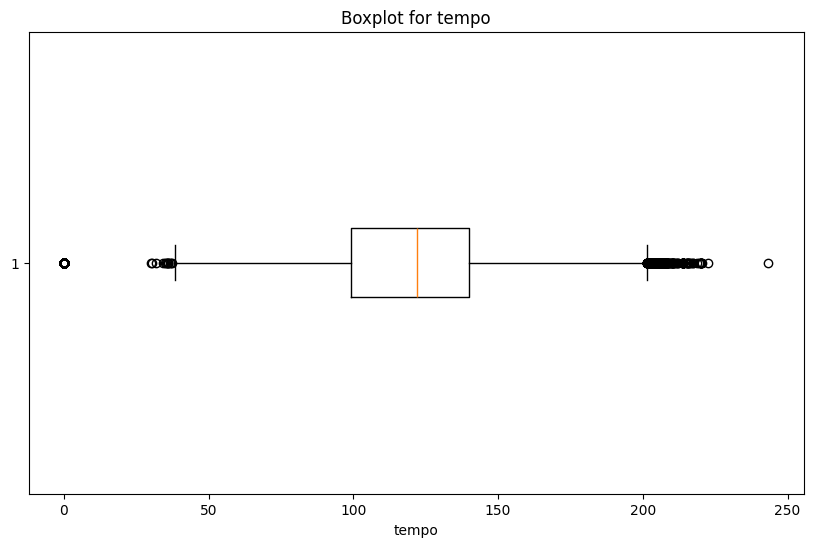

In [56]:
# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['tempo'], vert=False)
plt.title('Boxplot for tempo')
plt.xlabel('tempo')
plt.show()

In [57]:
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound  = Q3 + 1.5 * IQR
print("Lower ",lower_bound,"Upper ", upper_bound)

In [59]:
df_cleaned = df[(df['tempo'] >= lower_bound) & (df['tempo'] <= (upper_bound+15))]

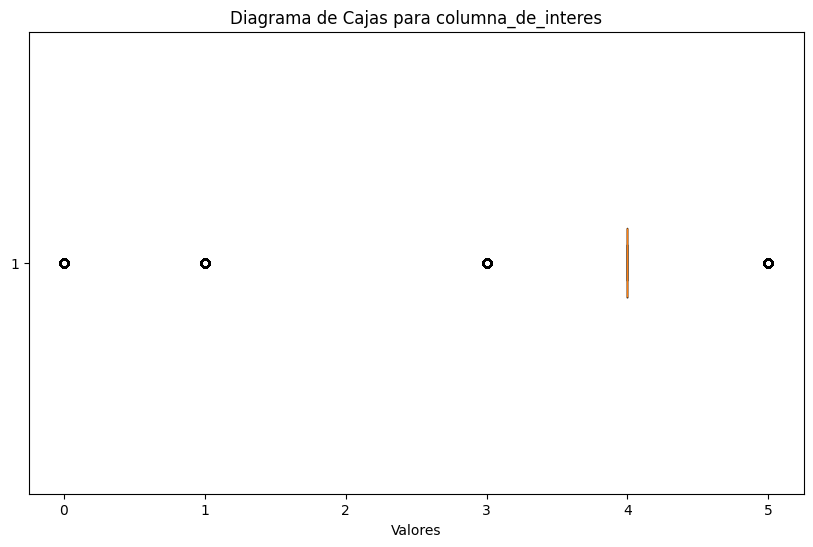

In [72]:
# Crear el diagrama de cajas
plt.figure(figsize=(10, 6))
plt.boxplot(df['time_signature'], vert=False)
plt.title('Diagrama de Cajas para columna_de_interes')
plt.xlabel('Valores')
plt.show()

In [66]:
numerical_summary

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Cleaning

In [63]:
df['track_genre'].unique()

<StringArray>
[   'Acoustic',    'Afrobeat',    'Alt Rock', 'Alternative',     'Ambient',
       'Anime', 'Black Metal',   'Bluegrass',       'Blues',      'Brazil',
 ...
     'Spanish',       'Study',     'Swedish',   'Synth Pop',       'Tango',
      'Techno',      'Trance',    'Trip Hop',     'Turkish', 'World Music']
Length: 113, dtype: string

In [65]:
df['track_genre'].value_counts()

track_genre
Latino         2000
Afrobeat       1000
Alt Rock       1000
Alternative    1000
Ambient        1000
               ... 
Techno         1000
Turkish        1000
Trip Hop       1000
World Music    1000
K Pop           999
Name: count, Length: 113, dtype: Int64

In [64]:

df['track_genre'] = df['track_genre'].str.replace('-', ' ').str.title()


df['track_genre'] = df['track_genre'].replace({'Latin': 'Latino'})


df['track_genre'].unique()

<StringArray>
[   'Acoustic',    'Afrobeat',    'Alt Rock', 'Alternative',     'Ambient',
       'Anime', 'Black Metal',   'Bluegrass',       'Blues',      'Brazil',
 ...
     'Spanish',       'Study',     'Swedish',   'Synth Pop',       'Tango',
      'Techno',      'Trance',    'Trip Hop',     'Turkish', 'World Music']
Length: 113, dtype: string


# A parte

In [29]:
df['track_id'].value_counts()

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
2vU6bm5hVF2idVknGzqyPL    7
5ZsAhuQ24mWHiduaxJqnhW    7
                         ..
5wMkhfu3oYYmFimOGzeFt2    1
64BdW5aHuB3C0QP3qjBJVi    1
1pBc7W7UQacUeQ6kBVlN9f    1
39So2wAM6l3XKWDf5XjiIz    1
5C4IiPTy5cR7lDkXgHHIpb    1
Name: count, Length: 89741, dtype: int64

There are some duplicated track_id, lets see the rows to understand if its have sense

In [30]:
filtered_rows = df[df['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']

filtered_rows.head(4)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop


In [31]:
filtered_rows['track_genre'].value_counts()

track_genre
blues                1
country              1
folk                 1
j-pop                1
j-rock               1
power-pop            1
psych-rock           1
singer-songwriter    1
songwriter           1
Name: count, dtype: int64

In [32]:
filtered_rows = df[df['track_id'] == '6sp6Vx3sv2l5qxPfbQkcyt']

# Mostrar las filas filtradas
filtered_rows.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
40,40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,0,306794,False,0.474,0.519,...,-5.291,1,0.0253,0.281,0.0,0.107,0.326,151.832,4,acoustic


In [33]:
filtered_rows = df[df['track_name'] == 'Halloween']

# Mostrar las filas filtradas
filtered_rows.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2783,2783,6TeJ52WYcJT92bO95BY17u,Siouxsie and the Banshees,Halloween Scary Party,Halloween,0,221466,False,0.223,0.91,...,-7.097,1,0.08,0.0116,0.000518,0.212,0.364,171.75,4,alt-rock
2787,2787,2drouoeVvVzz5cRfe9VK8W,Siouxsie and the Banshees,Halloween Songs | Witches Hour,Halloween,1,221466,False,0.223,0.91,...,-7.097,1,0.08,0.0116,0.000518,0.212,0.364,171.75,4,alt-rock
2788,2788,2u65iUSn9AerEa26a4HBPD,Siouxsie and the Banshees,Rock & Halloween,Halloween,2,221466,False,0.223,0.91,...,-7.097,1,0.08,0.0116,0.000518,0.212,0.364,171.75,4,alt-rock


# Crear el diagrama de cajas
plt.figure(figsize=(10, 6))
plt.boxplot(df['columna_de_interes'], vert=False)
plt.title('Diagrama de Cajas para columna_de_interes')
plt.xlabel('Valores')
plt.show()

## Transformations:

In [34]:
#Drop column
to_eliminate = ['Unnamed: 0']
df = df.drop(columns= to_eliminate)

#There are like 1 row of nulls, we should delete it instead of start fillna
df = df.dropna(subset=['artists'])

#Object to string
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns}) #Object to string

#Normalize for the future merge
df['artists'] = df['artists'].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)
df['track_name'] = df['track_name'].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)


In [35]:
df['key'].value_counts()

key
7     13244
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  string 
 1   artists           113999 non-null  string 
 2   album_name        113999 non-null  string 
 3   track_name        113999 non-null  string 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [37]:
df['track_name'].value_counts()

track_name
run rudolph run                                151
halloween                                       88
frosty the snowman                              84
little saint nick - 1991 remix                  76
last last                                       75
                                              ... 
那誰                                               1
靈魂相認                                             1
all i want for christmas is a real good tan      1
復刻回憶                                             1
adelaide                                         1
Name: count, Length: 72396, dtype: Int64

In [38]:
df.to_csv('../data/spotify_dataset_clean.csv', index=False)